In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import holidays
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (explained_variance_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             mean_squared_log_error,
                             r2_score)
from sklearn.model_selection import (GridSearchCV,
                                     TimeSeriesSplit)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import holidays
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (explained_variance_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             mean_squared_log_error,
                             r2_score)
from sklearn.model_selection import (GridSearchCV,
                                     TimeSeriesSplit)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error as MSE

import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [3]:
# Carregando os dados

df : pd.DataFrame = pd.read_csv('./data/checkpoints/df_demanda_potencia_v2.csv',index_col='Unnamed: 0')

df['val_cargaenergiahomwmed'] = df['val_cargaenergiahomwmed'].fillna(method='ffill')

df_train_xg = df.loc["2012-01-01":"2020-31-12 00:00"]
df_test_xg = df.loc["2021-01-01 00:00":"2021-12-31 23:00"]

columns_to_drop : list = ["val_cargaenergiahomwmed","nom_subsistema","id_subsistema","dataref","max_executado","DATE","ORDINAL_DATE","LINREG","dia_semana"]

print(df_train_xg.shape,df_test_xg.shape)

X_train_xg = df_train_xg.drop(columns=columns_to_drop)
y_train_xg = df_train_xg["val_cargaenergiahomwmed"]
X_test_xg = df_test_xg.drop(columns=columns_to_drop)
y_test_xg = df_test_xg["val_cargaenergiahomwmed"]

(78910, 35) (8759, 35)


In [4]:
loaded_model = joblib.load("./models/xgboost_v1.joblib.dat")
yhat = loaded_model.predict(X_test_xg)

c:\Users\augusto.lourencatto\Desktop\me\TCC\venv\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [6]:
# RMSE Computation
rmse = np.sqrt(MSE(y_test_xg, yhat))
print("RMSE : % f" %(rmse))

RMSE :  1883.378472


In [7]:
%%time
#Sem rooling windows
y_true, y_pred = np.array(y_test_xg), np.array(yhat)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape

CPU times: total: 0 ns
Wall time: 2.78 ms


3.9667346071036294

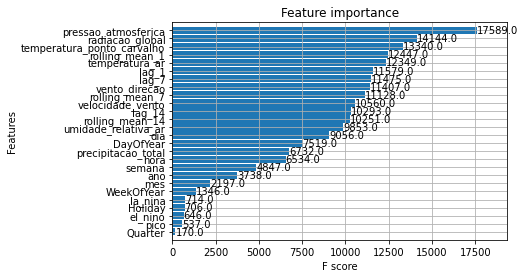

In [8]:
_ = plot_importance(loaded_model, height=0.9)